In [178]:
import xarray as xr
import numpy as np

In [179]:
outDS = xr.open_dataset('compress.isosph.CESM2.historical.r1i1p1f1.Output.nc')

In [187]:
outDS.pr.data[1]

array([6.81569054e-06, 3.52725838e-05, 2.85552210e-06, ...,
       1.25622173e-05, 2.69234697e-05, 1.52512885e-05], dtype=float32)

In [162]:
meanDS = xr.open_dataset('ymonmean.1980_2010.isosph.CMIP6.historical.ensmean.Output.nc')
stdDS = xr.open_dataset('ymonstd.1980_2010.isosph.CMIP6.historical.ensmean.Output.nc')

In [163]:
var_out = 'ps_pre'
var = 'ps'

In [164]:
dataset_out = outDS[var_out].data
dataset_out_orig = outDS[var].data

In [165]:
#outDS.pr.data = outDS.pr.data*10**8

In [189]:
outDS.pr_pre.data.shape

(1980, 40962)

In [167]:
(outDS.pr.data[0:12] - meanDS.pr.data)/stdDS.pr.data

array([[-1.0479417 , -0.9546133 , -0.9724671 , ..., -0.6560578 ,
        -0.00740049, -0.7396044 ],
       [-0.207145  ,  0.17588733, -1.6814566 , ..., -0.70990914,
        -0.04222084, -0.6157734 ],
       [-0.5737606 ,  1.0467695 , -1.292195  , ..., -0.7459941 ,
        -0.49882513, -0.6337878 ],
       ...,
       [ 1.9075043 ,  1.7799262 , -0.8661601 , ..., -0.5775211 ,
        -1.1829609 , -0.44201612],
       [-2.2885857 , -0.6361795 , -1.114302  , ..., -0.71720076,
        -1.0382967 , -0.5342501 ],
       [-0.41582143,  1.6442587 , -0.9238932 , ..., -0.7786043 ,
        -0.43899524, -0.6908868 ]], dtype=float32)

In [169]:
(outDS.pr.data[0:12]*10**8 - meanDS.pr.data*10**8)/(stdDS.pr.data*10**8)

array([[-1.04794174, -0.95461333, -0.97246711, ..., -0.65605777,
        -0.00740049, -0.73960443],
       [-0.207145  ,  0.17588734, -1.68145662, ..., -0.70990915,
        -0.04222084, -0.61577336],
       [-0.57376062,  1.0467695 , -1.292195  , ..., -0.74599407,
        -0.49882512, -0.63378779],
       ...,
       [ 1.90750427,  1.77992615, -0.86616008, ..., -0.57752107,
        -1.18296085, -0.44201611],
       [-2.28858579, -0.63617952, -1.11430199, ..., -0.71720073,
        -1.03829671, -0.5342501 ],
       [-0.41582144,  1.64425879, -0.92389323, ..., -0.77860435,
        -0.43899524, -0.6908868 ]])

In [177]:
outDS.pr.data[0:12]*10**8

array([[ 451.99931265, 2401.29847953,  720.91024776, ..., 1162.18707262,
        2524.80058407, 1204.91613416],
       [ 681.569054  , 3527.25837729,  285.55220979, ..., 1256.22173073,
        2692.34697043, 1525.12884597],
       [ 579.12652665, 4554.83677797,  518.10270634, ..., 3430.69441442,
        4333.2176574 , 3998.08850489],
       ...,
       [3335.51433869, 4361.36542703, 1857.7238734 , ...,  676.59234446,
         813.10627138,  685.41767178],
       [ 586.46651269, 2634.38105321, 1250.57777041, ..., 1266.97568703,
        2119.97667066, 1316.4703887 ],
       [1230.85364976, 3738.25641873,  988.9166904 , ..., 1784.7854906 ,
        3309.29324264, 1951.59027498]])

In [175]:
((outDS.pr_pre.data[0:12] * stdDS.pr.data*10**8) + meanDS.pr.data*10**8)

array([[ 718.11834914, 2616.02915543, 1000.57980035, ..., 1188.30316751,
        2087.46846511, 1339.25504997],
       [ 886.65948397, 3393.86551076,  832.11605215, ..., 1587.34960678,
        2509.11061812, 1941.70884242],
       [ 883.67843318, 4245.3838887 ,  977.05515145, ..., 4711.95767204,
        5105.36231104, 5107.67317792],
       ...,
       [2549.16799349, 3464.02125615, 2416.07320959, ..., 1863.49793694,
        2288.64480505, 1618.32076628],
       [1420.79352372, 2718.52234164, 1576.68882821, ..., 1920.53478258,
        3392.24670824, 1942.75493755],
       [1750.71309059, 3271.13361891, 1331.20780674, ..., 2248.49059123,
        3623.7464883 , 2327.7946184 ]])

In [176]:
testsum = []
for i in range(0, 12):
    testsum.append(np.mean(dataset_out[i]))

In [136]:
np.sum(testsum) 

0.782621

In [24]:
dataset_mean_v1 = meanDS[var].data
dataset_std_v1 = stdDS[var].data

In [66]:
data_all = []
for c in range(165):
    data_all.append(dataset_mean_v1)
dataset_mean = np.concatenate(data_all, axis=0)

In [65]:
data_all = []
for c in range(165):
    data_all.append(dataset_std_v1)
dataset_std = np.concatenate(data_all, axis=0)

In [67]:
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
lon_list = outDS.lon.data
lat_list = outDS.lat.data

In [69]:
unscaled = ( dataset_out * dataset_std ) + dataset_mean

In [74]:
abs(sum(unscaled[8]) - sum(dataset_out_orig[8]))

2413894.1640625

In [45]:
(sum(dataset_out[8])/ sum(dataset_out_orig[8]))*100

8.983160617233549e-05

In [580]:
diff = ((dataset_out_orig - unscaled) / dataset_out_orig) * 100

/var/folders/2k/h47n3n1n0p7b4yhssc9tmbyr__0hym/T/ipykernel_3023/1947149938.py:1: RuntimeWarning: divide by zero encountered in true_divide
  diff = ((dataset_out_orig - unscaled) / dataset_out_orig) * 100


In [581]:
import random
t1 = random.randint(1, 1980)
t2 = random.randint(1, 1980)
vizdata = unscaled[t1,:]

In [582]:
dataset_out_orig.shape

(1980, 40962)

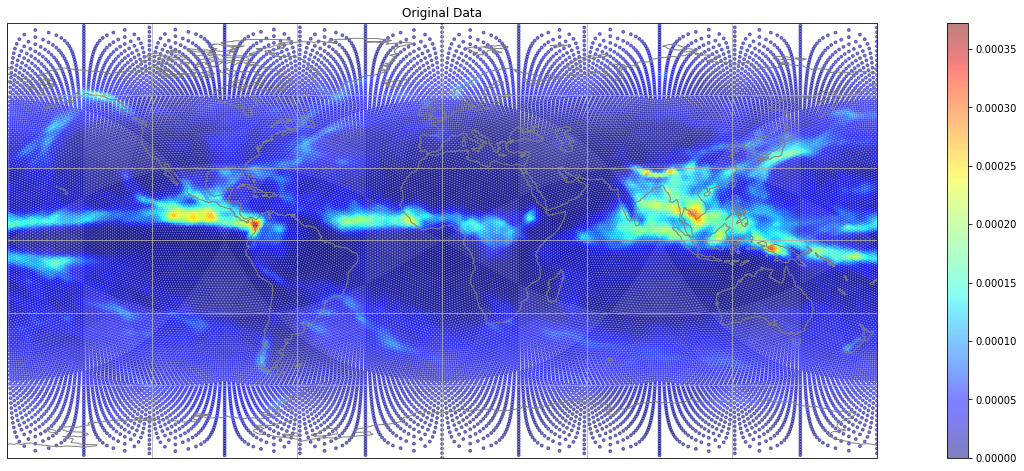

In [583]:
fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

v = plt.scatter(x=lon_list, y=lat_list,
            c=dataset_out_orig[t1,:],
            s=8,
            alpha=0.5,
            cmap='jet',
            transform=crs.PlateCarree()) ## Important
#plt.clim(0.0003, 0.0004) # only for precip
#plt.clim(96000, 104000) #for psl
plt.colorbar(v, ax=ax)
plt.title("Original Data")

plt.show()

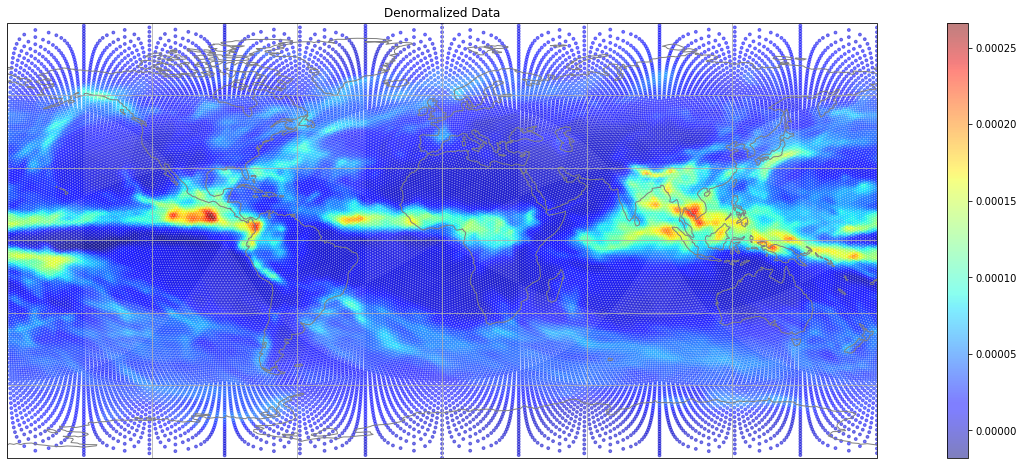

In [584]:

fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

v = plt.scatter(x=lon_list, y=lat_list,
            c=vizdata,
            s=8,
            alpha=0.5,
            cmap='jet',
            transform=crs.PlateCarree()) ## Important

#plt.clim(0.00000, 0.0005) # only for precip
#plt.clim(96000, 104000) #for psl
plt.colorbar(v, ax=ax)
plt.title("Denormalized Data")

plt.show()

In [585]:
#np.save("denorm_tas1.npy", unscaled[t1,:])

In [586]:
#np.save("denorm_tas2.npy", unscaled[t2,:])

In [587]:
#np.load('denorm_tas2.npy')

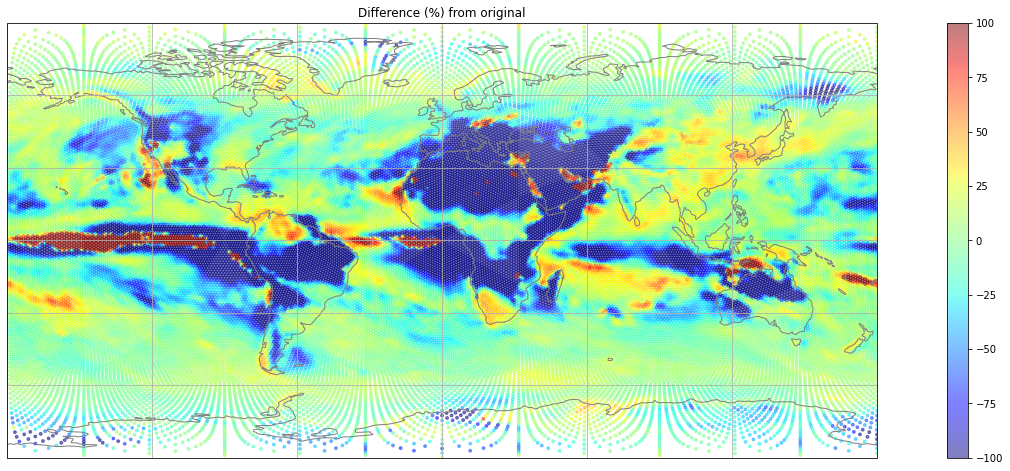

In [593]:
fig = plt.figure(figsize=(25,8))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree())

ax.set_global()

ax.add_feature(cfeature.COASTLINE, edgecolor="grey")
#ax.add_feature(cfeature.BORDERS, edgecolor="tomato")
ax.gridlines()

v = plt.scatter(x=lon_list, y=lat_list,
            c=diff[t1,:],
            s=8,
            alpha=0.5,
            cmap='jet',
            transform=crs.PlateCarree()) ## Important

plt.clim(-100, 100)
plt.colorbar(v, ax=ax)
plt.title("Difference (%) from original")
plt.show()

In [603]:
nmax = []
nmin = []
for d in range(len(diff)):
    nmax.append(diff[d].max())
    nmin.append(diff[d].min())